In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant
from scipy.optimize import curve_fit
import math
import scipy.stats as stats

# Maxwell-Boltzmann Distribution
The Maxwell-Boltzmann distribution is a distribution in velocity. Thus we aim to find that the velocities of our particles, after a sufficient number of collisions, follow this distribution. The same would be true for momentum for particles that do not change in mass. For energy, however, the probability distribution of the energies of the particles is modelled by a simpler Boltzmann distribution.
## 1 Dimension in Velocity
The Maxwell-Boltzmann Distribution in 1 Dimension has the form:
$$ f_{1D}(v)=\left(\frac{m}{2πkT}\right)^{1/2} exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{2kT}{\pi m} \right)^{1/2}.$$
To interpret as speed and not velocity the distribution is multiplied by 2. 

A generalised form of the formula can be seen here:
$$f(v) = 2\sqrt{\frac{\alpha}{\pi}}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## 2 Dimensions in Velocity
The Maxwell-Boltzmann Distribution in 2 Dimensiona has the form:
$$ f_{2D}(v)=\left(\frac{m}{2πkT}\right)exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{8kT}{\pi m} \right).$$

A generalised form of the formula can be seen here:
$$f(v) = \frac{\alpha}{\pi}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## Boltzmann Distribution in Energy
The Boltzmann distribution defines the probability that a system will be in a certain state as a function of that state's energy and temperature and is expressed in the form:
$$p(\epsilon_i) \approx e^{-\frac{\epsilon_i}{k_BT}}$$
where $\epsilon_i$ is the energy of the state, and $p$ is the probaility of the system being in state $i$

[8.14238015e-07 9.99999387e-01 2.00000490e+00]


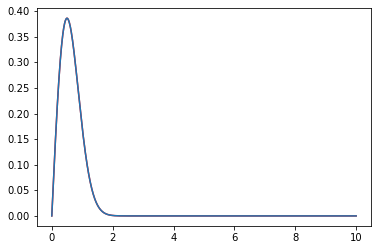

In [36]:
def Maxwell_Boltzmann_1D(v, m=1, T=10000):
    return 2*np.sqrt(m/(2*np.pi*constant.k*T)) * np.exp(-(m*(v)**2)/(2*constant.k*T))

def Maxwell_Boltzmann_1D_Simple(v, v_offset = 0, k = 1, alpha = 2):
    # return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)
    # return background + 2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)
    return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)

def Maxwell_Boltzmann_2D(v, v_offset = 0,m=1,T=10000):
    return (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))
    # return background + (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))


def Maxwell_Boltzmann_2D_Simple(v,v_offset = 0, k=1, alpha=2):
    return k*2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)
    # return k*2*alpha/np.pi*(v)* np.exp(-alpha*(v)**2)
    # return background + 2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)

def Maxwell_Boltzmann_2D_speed(v,v_offset = 0, alpha = 1, k = 1, l = 1):
    return k*2*alpha*(v-v_offset)*np.exp(-alpha*l*(v-v_offset)**2)
    
v = np.linspace(0,10,1000)
f = Maxwell_Boltzmann_2D_Simple(v)
plt.plot(v,f,'r')

params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, v, f, p0=[0,1,20], bounds = (0, 100))
perr = np.sqrt(np.diag(pcov))
x_interval_for_fit = np.linspace(v[0], v[-1], 10000)
print(params)

plt.plot(v, Maxwell_Boltzmann_2D_Simple(v, *params), label='f')

plt.show()

In [37]:
class Trader:
    def __init__(self,cash = 1 , commodities = [0] , commodity_value = 0.5, no_commodities = 1):
        self.no_commodities = no_commodities
        self._cash = cash
        self.commodities = np.ones(self.no_commodities)
        self.commodity_valuation = commodity_value
        
        assert len(commodities) <= no_commodities, 'Too few commodities for provided input commodity value array'
        for i, value in enumerate(commodities):
            assert value >= 0 and type(value) == int, 'Must have positive integer number of commodities'
            self.commodities[i] = float(value)
        assert no_commodities > 0 and type(no_commodities) == int, 'Must have positive integer number of commodities'
        
    @property
    def cash(self):
        return self._mass

    @cash.setter
    def cash(self, value):
        self._cash = value

In [54]:
class Market():
    
    def __init__ (self,starting_commodities = 100, commodity_value = 0.5, no_traders = 100, simulation_length=1000, no_commodities = 1):
        self.no_traders = int(no_traders)
        self.simulation_length = int(simulation_length)
        self.starting_commodities = starting_commodities
        self.commodity_value = commodity_value
        self.m = particle_mass
        self.no_commodities = no_commodities


        
        self.init_particles()
        
    def init_particles(self):
        
        # Creating storage array for 4 constant variables: mass, energy, and magnitude of velocity and momentum
        # then 2*no_commodities for vector velocity and momentum
        self.market_history = np.ones([1+self.no_commodities,self.no_traders,self.simulation_length],dtype=float)
        
        # array of particle objects
        self.particles = []
        
        self.particle_history_dict = {
            'Cash'       : 0
        }
        
        for i in range(1,self.no_commodities):
            # Creating string for dimension specific labels
            
            self.particle_history_dict['Commodity' + f'_{i}'] = i

        # Creating particle object for each particle in simulation
        for i in range(self.no_traders):
            
            
            # Creating particles & may want to unify particle objects if their methods become extensive
            trader = Trader(commodities = np.full(self.no_commodities,self.starting_commodities,dtype=int),commodities = self.starting_commodities, m = 1, no_commodities = self.no_commodities)

            self.particles.append(particle)
            
            # Adding particle properties to history array
            self.particle_history[0,i,0] = particle.mass
            self.particle_history[1,i,0] = particle.energy
            self.particle_history[2,i,0] = particle.velocity_magnitude
            self.particle_history[3,i,0] = particle.momentum_magnitude
            self.particle_history[4,i,0] = particle.commodities
            
            # For greater than 1 dimension simulations
            if self.dimensions > 1:
                for j in range(self.dimensions):
                    self.particle_history[j+4,i,0] = particle.velocity[j]
                    self.particle_history[j+4+self.dimensions,i,0] = particle._momentum[j]
    
    def begin_simulation(self,collision_type = 'exchange'):
        self.type = collision_type
        
        for step in range(1,self.simulation_length):
            self.step = step
            self.simulate_set_of_collisions()
        
        print('Simulation Complete!')

    def simulate_set_of_collisions(self):
        # Randomise which particle is being collided with using shuffled collision partner array
        collision_partner = np.array(range(0,self.no_traders))
        np.random.shuffle(collision_partner)
        
        # number of collisions = number of particles/2
        for i in range(int(self.no_traders/2)):
            
            #index for collisions partners
            index1 = collision_partner[i]
            index2 = collision_partner[(i+int(self.no_traders/2)) % self.no_traders] # modulus to wrap array indices
            
            # Calling the collision method
            self.collision(self.particles[index1],self.particles[index2])
            
            self.update_parameters_after_collision(index1,index2)     
                    
    def collision(self,particle1,particle2):
        # Select for type of collision
        if self.type == 'random':
            self.random_collision(particle1,particle2)
        elif self.type == 'exchange':
            self.exchange(particle1,particle2)
        elif self.type == 'transaction':
            self.transaction(particle1,particle2)
            
    def transaction(self,particle1,particle2):
        
        
        
    
    def exchange(self,particle1,particle2):
        
        self.random_collision(particle1,particle2)
        
        total_commodities = particle1.commodities + particle2.commodities
        fractional_commodity_transfer = np.random.random()
        
        particle1.commodities = round(total_commodities*fractional_commodity_transfer)
        particle2.commodities = round(total_commodities*(1-fractional_commodity_transfer))
        
        # print(f'{particle1.commodities} + {particle2.commodities} = {total_commodities}')
            
    def random_collision(self,particle1,particle2):
        
        # Momentum is conserved
        # mv + m'v' (before) = mv + m'v' (after)

        p_before = np.ones(self.dimensions)
        p_after = np.ones((self.dimensions,2))
        v_after = np.ones((self.dimensions,2))
        fractional_momentum_transfer = np.ones(self.dimensions)

        for i in range(self.dimensions):
            p_before[i] = particle1.mass*particle1.velocity[i] + particle2.mass*particle2.velocity[i]
            
            # randomise transfer of energy
            fractional_momentum_transfer[i] = np.random.random()
        
            p_after[i,0] = fractional_momentum_transfer[i]*p_before[i]
            p_after[i,1] = fractional_momentum_transfer[i]*p_before[i]  
            
            v_after[i,0] = p_after[i,0]/particle1.mass
            v_after[i,1] = p_after[i,1]/particle1.mass
                     
            particle1.velocity[i] = v_after[i,0]
            particle2.velocity[i] = v_after[i,1]
            
            particle1.update()
            particle2.update()


    def update_parameters_after_collision(self,index1,index2):
        
        self.particle_history[0,index1,self.step] = self.particles[index1].mass
        self.particle_history[0,index2,self.step] = self.particles[index2].mass

        self.particle_history[1,index1,self.step] = self.particles[index1].energy
        self.particle_history[1,index2,self.step] = self.particles[index2].energy

        self.particle_history[2,index1,self.step] = self.particles[index1].velocity_magnitude
        self.particle_history[2,index2,self.step] = self.particles[index2].velocity_magnitude

        self.particle_history[3,index1,self.step] = self.particles[index1].momentum_magnitude
        self.particle_history[3,index2,self.step] = self.particles[index2].momentum_magnitude
        
        self.particle_history[4,index1,self.step] = self.particles[index1].commodities
        self.particle_history[4,index2,self.step] = self.particles[index2].commodities

        if self.dimensions > 1:
            for j in range(self.dimensions):
                self.particle_history[j+5,index1,self.step] = self.particles[index1].velocity[j]
                self.particle_history[j+5,index2,self.step] = self.particles[index2].velocity[j]
                
                self.particle_history[j+5+self.dimensions,index1,self.step] = self.particles[index1]._momentum[j]
                self.particle_history[j+5+self.dimensions,index2,self.step] = self.particles[index2]._momentum[j]

 
            
    def fit_Maxwell_Boltzmann(self, bin_heights, bin_edges, ax, variable_being_fitted):
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        ax.plot(bin_centres,bin_heights)

        opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D_speed, bin_centres, bin_heights, p0=[1, 1, 1], bounds = (0,50))
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_2D_Simple(x_interval_for_fit, *opt_params)
        ax.plot(x_interval_for_fit, fit_y, label = 'f')

    def plot_data(self,time_steps_to_plot = [], MB_fit = False ,Mass = False, Energy = False, Velocity = True, Momentum = False, **other_variables):
        plot_data_arguments = {}
        self.time_steps_to_plot = time_steps_to_plot
        
        for key, value in locals().items():
            if type(value) == bool:
                plot_data_arguments[key] = value
        
        for key, value in other_variables.items():
            plot_data_arguments[key] = value
        
        size_of_plot = 0
        for key, value in plot_data_arguments.items():
            if value == True:size_of_plot += 1
        
        distributions = []
        
        plt.rcParams["figure.figsize"] = (40,size_of_plot*5)
        plt.rcParams["figure.dpi"] = 100
        
        fig = plt.figure(constrained_layout=True)        
        
        plot_index = 0

        variables_to_plot = []
        
        for i, (key,value) in enumerate(plot_data_arguments.items()):
            if value == True:
                variables_to_plot.append(key)

        plt.suptitle(f'Parameter Distributions at Different time step in {self.dimensions}-Dimension Collision Simulation',fontsize='xx-large')
        subfigs = fig.subfigures(nrows=size_of_plot, ncols=1)

        for row, subfig in enumerate(np.array(subfigs,ndmin=1)):
            subfig.suptitle(f'{variables_to_plot[row]} Distribution',fontsize='large')
            axs = subfig.subplots(nrows=1, ncols=len(time_steps_to_plot))
            for col, ax in enumerate(axs):
                bin_heights , bin_edges, _ = ax.hist(self.particle_history[self.particle_history_dict[variables_to_plot[row]],:,time_steps_to_plot[col]],bins=40,density = True,stacked = True)
                ax.set_title(f'Time = {time_steps_to_plot[col]}', fontsize = 'large')
                
                if MB_fit == True:
                    self.fit_Maxwell_Boltzmann(bin_heights, bin_edges, ax, variables_to_plot[row])
                distributions.append(bin_heights)        
        

        plt.show()
        return distributions
        

sim = Simulation(no_traders=1000,simulation_length=100, Dimensions = 2)
sim.begin_simulation()

Simulation Complete!


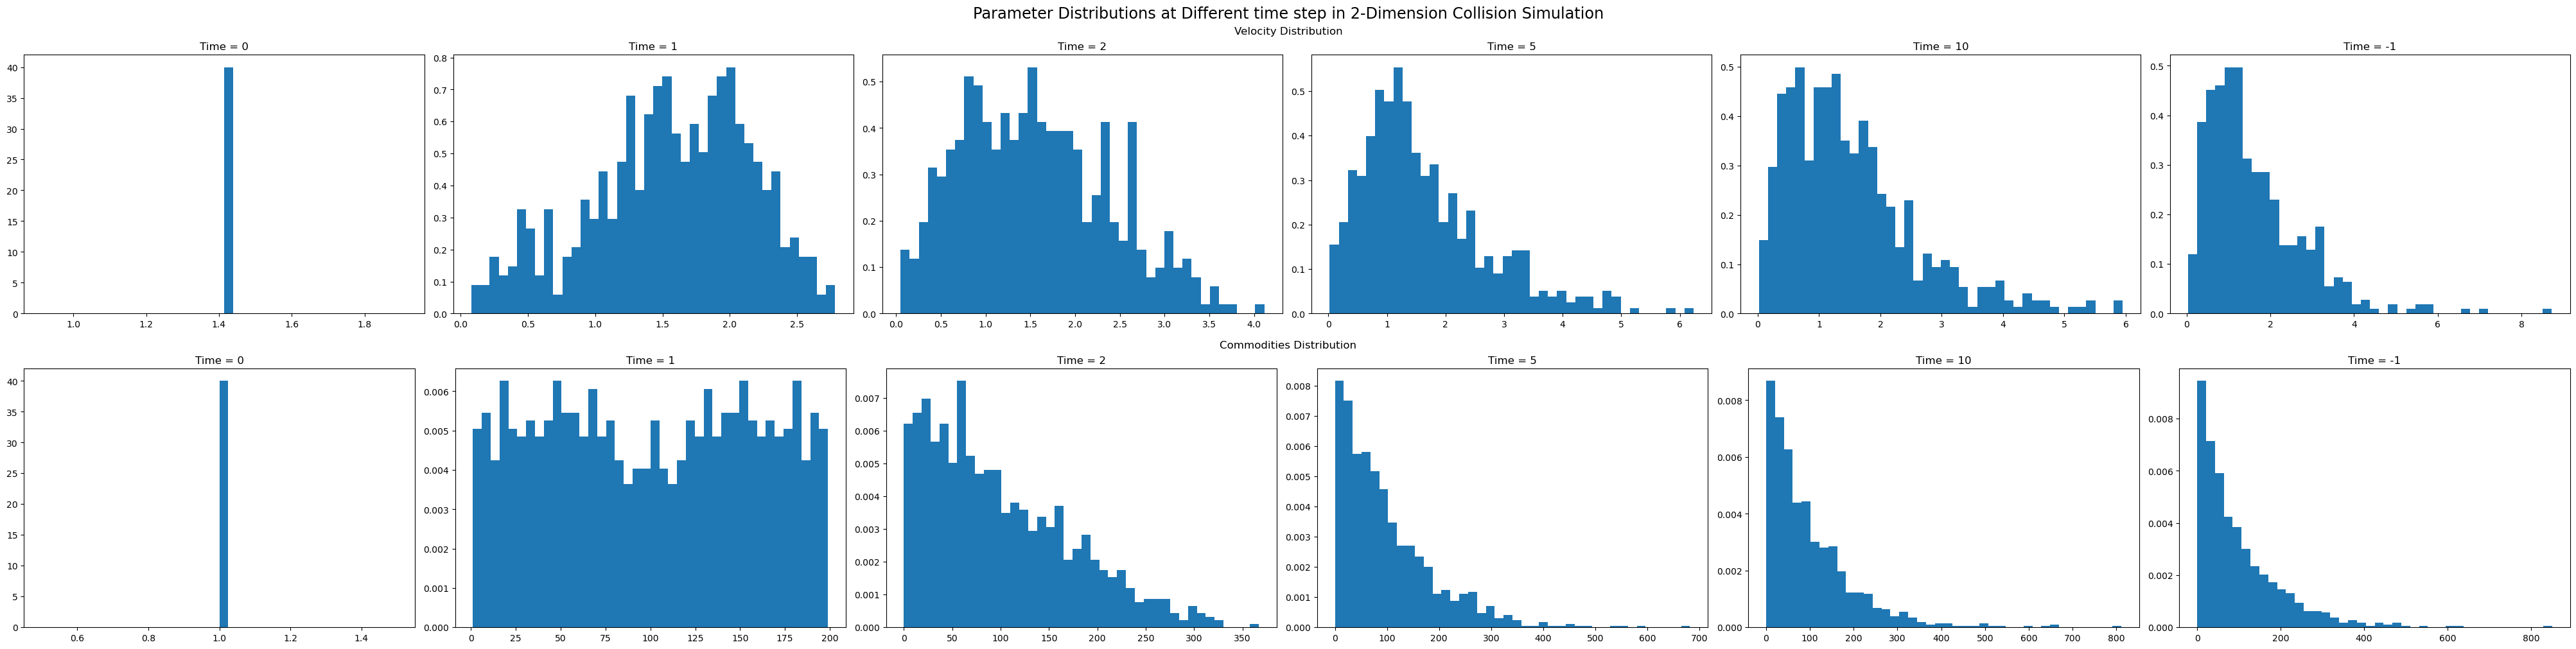

In [55]:
# plt.rcParams["figure.figsize"] = (40,5)
distributions = sim.plot_data(time_steps_to_plot = [0,1,2,5,10, -1], Commodities = True)

col: 0, ax: AxesSubplot(0.125,0.125;0.168478x0.755)
col: 1, ax: AxesSubplot(0.327174,0.125;0.168478x0.755)
col: 2, ax: AxesSubplot(0.529348,0.125;0.168478x0.755)
col: 3, ax: AxesSubplot(0.731522,0.125;0.168478x0.755)


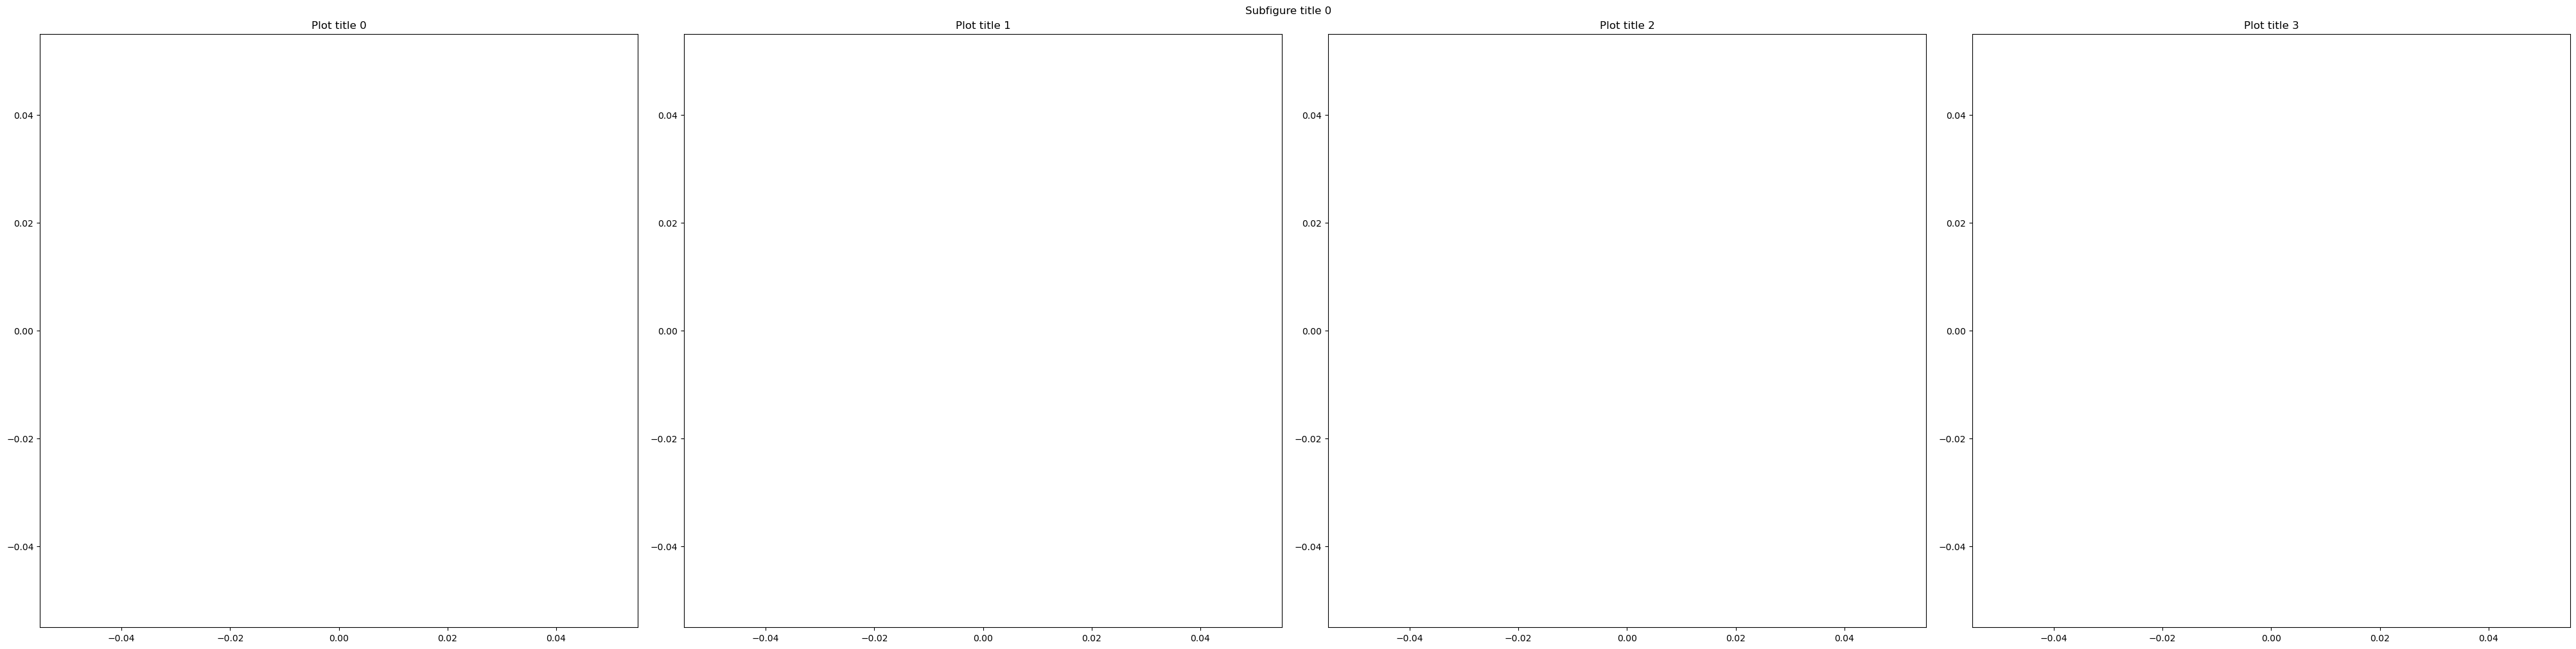

In [72]:
fig = plt.figure(constrained_layout=True)
time_steps = [0, 1, 2, 3]
dictionary = {
    'mass' : True
}



# for key, value in dictionary:
#     if value == True:
        
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=len(dictionary), ncols=1)
for row, subfig in enumerate(np.array(subfigs, ndmin=1)):
    subfig.suptitle(f'Subfigure title {row}')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=len(time_steps))
    for col, ax in enumerate(axs):
        print(f'col: {col}, ax: {ax}')
        ax.plot()
        ax.set_title(f'Plot title {col}')
        

In [37]:
 def plot_data(Velocity = True, Momentum = False, **other_variables):
        plot_data_arguments = {}
        for key, value in locals().items():
            if type(value) == bool:
                plot_data_arguments[key] = value
        print(locals())
        print(plot_data_arguments)
        for key, value in other_variables.items():
            plot_data_arguments[key] = value
        print(plot_data_arguments)
plot_data(Velocity = True, Momentum = False, Velocity_1=True)
# print(locals())
# print(plot_data_arguments)

{'Velocity': True, 'Momentum': False, 'other_variables': {'Velocity_1': True}, 'plot_data_arguments': {'Velocity': True, 'Momentum': False}, 'key': 'plot_data_arguments', 'value': {'Velocity': True, 'Momentum': False}}
{'Velocity': True, 'Momentum': False}
{'Velocity': True, 'Momentum': False, 'Velocity_1': True}


In [ ]:
 
    def fit_Maxwell_Boltzmann_2D(self,bin_heights, bin_edges):
        
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)
        
        opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_2D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')
        
    def plot_energy_histogram(self):
        
        # Plotting histogram and extracting parameters for fitting with distribution
        bin_heights , bin_edges, _ = plt.hist(self.particle_history[3,-1,:],bins=40)
        
        # self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        
        
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Kinetic Energy (J)')
        plt.ylabel('Number of particles')
        plt.title('Energy distribution of equivalent colliding particles in 2D')
        plt.show()
        
    def plot_momentum_histogram(self):
            
        magnitude_momentum = np.sqrt(np.square(self.particle_history[4,-1,:])+np.square(self.particle_history[5,-1,:]))        
        bin_heights , bin_edges, _ = plt.hist(magnitude_momentum,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Momentum (kgm/s')
        plt.ylabel('Number of particles')
        plt.title('Momentum distribution of colliding particles in 2D')
        plt.show()
        
    
    def plot_velocity_histogram(self):
        
        magnitude_velocity = np.sqrt(np.square(self.particle_history[0,-1,:])+np.square(self.particle_history[1,-1,:]))
        bin_heights, bin_edges, _ = plt.hist(magnitude_velocity,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('velocity (m/s)')
        plt.ylabel('Number of particles')
        plt.title('Velocity distribution of equivalent colliding particles in 2D')
        plt.show()
        
    def fit_Maxwell_Boltzmann(self,bin_heights, bin_edges):

        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)

        opt_params, pcov = curve_fit(Maxwell_Boltzmann_1D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_1D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')


    def plot_histogram(self, particle_variable, variable_name, dimensions = 1,fit_boolean = True):
        bin_heights, bin_edges, _ = plt.hist(parameter, bins = 40, alpha = 0.5)

        if fit_boolean == True:
            fit_Maxwell_Boltzmann(bin_heights, bin_edges, variable_name)
        # !!! Define variable_name as the literal name of the particle attribute !!!

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel(variable_name)
        plt.ylabel('Normalised population')
        plt.title(f'{variable_name} distribution of colliding particles in {dimensions}D')
        plt.show()        
        

In [ ]:
# numpy array setter function
class ArrayAccesser:
    
    def __init__(self,dimensions = 3):
        self._matrix = np.ones(dimensions)
        
    @property
    def matrix(self):
        return self._matrix
    
    @matrix.setter
    def matrix(self,value):
        self._matrix = value
    
Object1 = ArrayAccesser(dimensions = 3)

print(Object1.matrix[0])
Object1.matrix[0] = 5
print(Object1.matrix[2])

In [24]:

class Particle:
    def __init__(self,v = 20, m = 50):
        self._velocity = v
        self._mass = m
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*self._velocity**2

    @property
    def velocity(self):
        # print("getter method called")
        
        return self._velocity

    @velocity.setter
    def velocity(self, value):
        # print("setter method called")
        self._velocity = value
        self._momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
        # print(self.energy)
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._momentum)
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
            
class Particle2D:
    def __init__(self,velocity_x = 1, velocity_y = 2, m = 3):
        self._velocity = np.array((float(velocity_x),float(velocity_y)))
        self._mass = m
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)

    @property
    def momentum(self):
        return self._momentum

    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self.mass
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    def update(self):
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
class Particle3D:
    def __init__(self, m = 1, v_x = 1, v_y = 1, v_z = 1):
        self._mass = m
        self._velocity = np.array((float(v_x),float(v_y),float(v_z)))
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)

    @property
    def momentum(self):
        return self._momentum

    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self.mass
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_z(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_z.setter
    def velocity_z(self, value):
        # print("setter method called")
        self._velocity[2] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    def update(self):
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2